In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"C:\Users\sathy\Downloads\Plastic Waste Around the World.csv")

# Encode categorical column "Main_Sources"
le = LabelEncoder()
data["Main_Sources"] = le.fit_transform(data["Main_Sources"])

# Features (X) and Target (y)
X = data[["Total_Plastic_Waste_MT", "Main_Sources", "Per_Capita_Waste_KG"]]
y = data["Recycling_Rate"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("📊 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("📊 R² Score:", r2_score(y_test, y_pred))


📊 Mean Squared Error: 108.82563878575397
📊 R² Score: 0.48346691047492674



📊 Regression Results (Recycling Rate):
Mean Squared Error: 108.82563878575397
R² Score: 0.48346691047492674


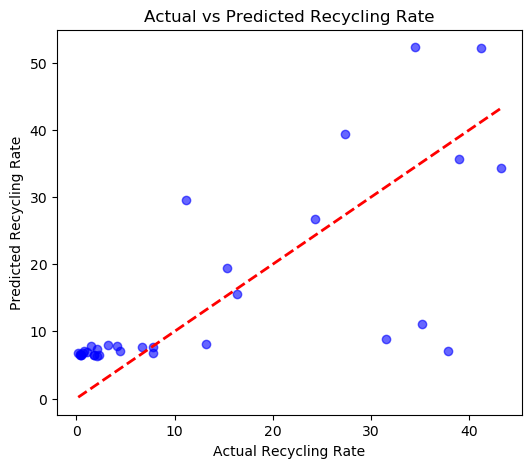


📊 Classification Results (Coastal Waste Risk):
Accuracy: 0.48484848484848486

Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.75      0.58        12
         Low       0.44      0.36      0.40        11
      Medium       0.50      0.22      0.31         9
   Very_High       1.00      1.00      1.00         1

    accuracy                           0.48        33
   macro avg       0.60      0.58      0.57        33
weighted avg       0.49      0.48      0.46        33



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# ==============================
# Load dataset
# ==============================
data = pd.read_csv(r"C:\Users\sathy\Downloads\Plastic Waste Around the World.csv")

# ==============================
# Encode categorical columns
# ==============================
le_sources = LabelEncoder()
data["Main_Sources"] = le_sources.fit_transform(data["Main_Sources"])

le_risk = LabelEncoder()
data["Coastal_Waste_Risk"] = le_risk.fit_transform(data["Coastal_Waste_Risk"])

# ==============================
# 1️⃣ Regression: Predict Recycling_Rate
# ==============================
X_reg = data[["Total_Plastic_Waste_MT", "Main_Sources", "Per_Capita_Waste_KG"]]
y_reg = data["Recycling_Rate"]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred_reg = reg_model.predict(X_test)

print("\n📊 Regression Results (Recycling Rate):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))

# Plot Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_reg, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Recycling Rate")
plt.ylabel("Predicted Recycling Rate")
plt.title("Actual vs Predicted Recycling Rate")
plt.show()

# ==============================
# 2️⃣ Classification: Predict Coastal_Waste_Risk
# ==============================
X_clf = data[["Total_Plastic_Waste_MT", "Main_Sources", "Per_Capita_Waste_KG", "Recycling_Rate"]]
y_clf = data["Coastal_Waste_Risk"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_c, y_train_c)

y_pred_clf = clf_model.predict(X_test_c)

print("\n📊 Classification Results (Coastal Waste Risk):")
print("Accuracy:", accuracy_score(y_test_c, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_clf, target_names=le_risk.classes_))
